In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('dataset2.csv')
data

,trafficID,num_cars,weatherStamp:,timeStamp,dateStamp,greenTime
0,B1,0,NaN,20:18:04,2024-07-30,3
1,C1,0,NaN,20:18:04,2024-07-30,3
2,B2,0,NaN,20:18:09,2024-07-30,3
3,C2,0,NaN,20:18:09,2024-07-30,3
4,D1,119,30.0,20:18:13,2024-07-30,50
...,...,...,...,...,...,...
3325,A1,41,30.0,23:15:21,2024-07-30,21
3326,B3,0,NaN,23:15:22,2024-07-30,3
3327,C2,0,NaN,23:15:24,2024-07-30,3
3328,D3,78,30.0,23:15:26,2024-07-30,39


In [3]:

# Data Cleaning and Feature Engineering
data['dateStamp'] = pd.to_datetime(data['dateStamp'])
data['timeStamp'] = pd.to_datetime(data['timeStamp'], format='%H:%M:%S')
data['hour'] = data['timeStamp'].dt.hour
data['day_of_week'] = data['dateStamp'].dt.dayofweek

# Handle missing 'weatherStamp' values
weather_median = data['weatherStamp:'].median()
data['weatherStamp:'].fillna(weather_median, inplace=True)



In [4]:
data

,trafficID,num_cars,weatherStamp:,timeStamp,dateStamp,greenTime,hour,day_of_week
0,B1,0,30.0,1900-01-01 20:18:04,2024-07-30,3,20,1
1,C1,0,30.0,1900-01-01 20:18:04,2024-07-30,3,20,1
2,B2,0,30.0,1900-01-01 20:18:09,2024-07-30,3,20,1
3,C2,0,30.0,1900-01-01 20:18:09,2024-07-30,3,20,1
4,D1,119,30.0,1900-01-01 20:18:13,2024-07-30,50,20,1
...,...,...,...,...,...,...,...,...
3325,A1,41,30.0,1900-01-01 23:15:21,2024-07-30,21,23,1
3326,B3,0,30.0,1900-01-01 23:15:22,2024-07-30,3,23,1
3327,C2,0,30.0,1900-01-01 23:15:24,2024-07-30,3,23,1
3328,D3,78,30.0,1900-01-01 23:15:26,2024-07-30,39,23,1


In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and you've loaded it as shown previously

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['num_cars', 'hour', 'day_of_week', 'weatherStamp:', 'greenTime']].values)

# Function to create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        xs.append(data[i:(i+sequence_length), :-1])
        ys.append(data[i+sequence_length, -1])
    return np.array(xs), np.array(ys)

# Creating sequences
sequence_length = 5  # you can tweak this parameter
X, y = create_sequences(scaled_data, sequence_length)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Making predictions (optional)
predictions = model.predict(X_test)


Epoch 1/20


c:\Users\trh00\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 - 2s - 18ms/step - loss: 0.0996 - val_loss: 0.1037
Epoch 2/20
84/84 - 0s - 2ms/step - loss: 0.0978 - val_loss: 0.1027
Epoch 3/20
84/84 - 0s - 2ms/step - loss: 0.0975 - val_loss: 0.1023
Epoch 4/20
84/84 - 0s - 2ms/step - loss: 0.0973 - val_loss: 0.1029
Epoch 5/20
84/84 - 0s - 2ms/step - loss: 0.0974 - val_loss: 0.1035
Epoch 6/20
84/84 - 0s - 2ms/step - loss: 0.0969 - val_loss: 0.1031
Epoch 7/20
84/84 - 0s - 2ms/step - loss: 0.0971 - val_loss: 0.1027
Epoch 8/20
84/84 - 0s - 2ms/step - loss: 0.0975 - val_loss: 0.1019
Epoch 9/20
84/84 - 0s - 2ms/step - loss: 0.0971 - val_loss: 0.1024
Epoch 10/20
84/84 - 0s - 2ms/step - loss: 0.0973 - val_loss: 0.1020
Epoch 11/20
84/84 - 0s - 2ms/step - loss: 0.0972 - val_loss: 0.1019
Epoch 12/20
84/84 - 0s - 2ms/step - loss: 0.0972 - val_loss: 0.1020
Epoch 13/20
84/84 - 0s - 2ms/step - loss: 0.0971 - val_loss: 0.1023
Epoch 14/20
84/84 - 0s - 2ms/step - loss: 0.0969 - val_loss: 0.1029
Epoch 15/20
84/84 - 0s - 2ms/step - loss: 0.0971 - val_loss: 0.1031

C:\Users\trh00\AppData\Local\Temp\ipykernel_15448\3415500206.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['timeStamp'] = pd.to_datetime(data['timeStamp'].astype(str))
c:\Users\trh00\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\trh00\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\trh00\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

                               SARIMAX Results                                
Dep. Variable:               num_cars   No. Observations:                 3330
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15683.851
Date:                Wed, 31 Jul 2024   AIC                          31373.703
Time:                        12:05:13   BIC                          31392.034
Sample:                             0   HQIC                         31380.262
                               - 3330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0562      0.022     -2.614      0.009      -0.098      -0.014
ma.L1         -0.9999      0.022    -46.480      0.000      -1.042      -0.958
sigma2       722.1967     16.448     43.908      0.0

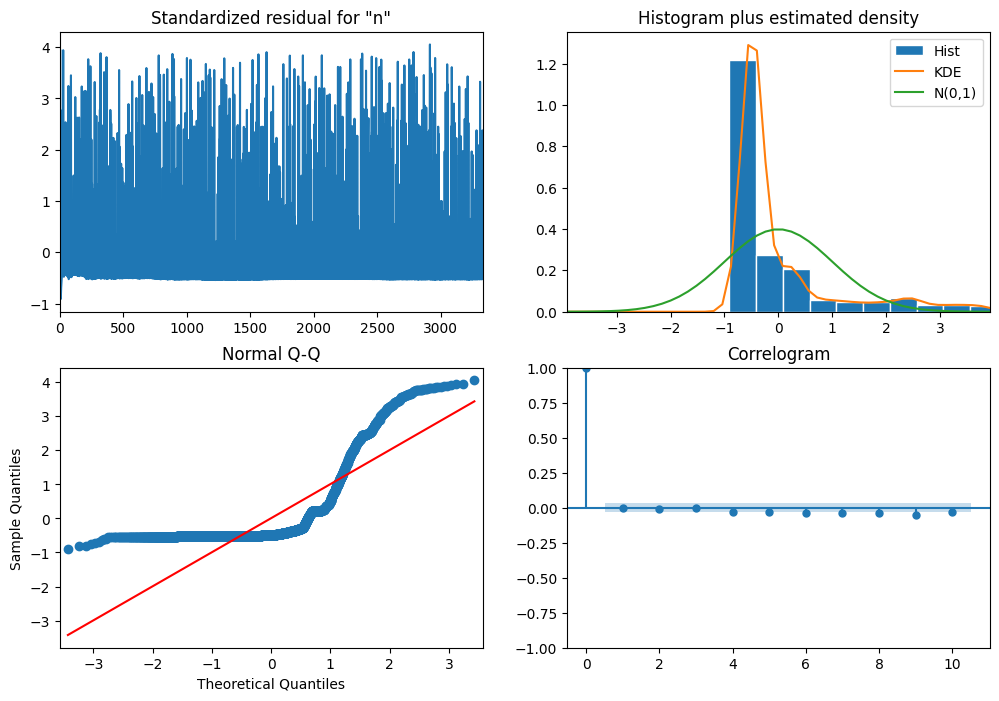

Forecast: 3330    14.106924
3331    13.313688
3332    13.358292
3333    13.355783
3334    13.355924
Name: predicted_mean, dtype: float64


c:\Users\trh00\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\trh00\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# Load and prepare your data
data = pd.read_csv('dataset2.csv')
data['dateStamp'] = pd.to_datetime(data['dateStamp'])
data['timeStamp'] = pd.to_datetime(data['timeStamp'].astype(str))

# Combine 'dateStamp' and 'timeStamp' into a single datetime column
data['datetime'] = pd.to_datetime(data['dateStamp'].dt.date.astype(str) + ' ' + data['timeStamp'].dt.time.astype(str))

# Set the new datetime column as the index
data.set_index('datetime', inplace=True)

# Assuming you want to model 'num_cars' as your time series variable
series = data['num_cars']

# Fit an ARIMA model
model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecast future values
forecast = model_fit.forecast(steps=5)
print("Forecast:", forecast)
